In [539]:
# This notebook shows results of the Technical Case Study for Dunnhumby, for two datasets. 
# To run the notebook for Section 2 questions, download the carbo-loading dataset here and save locally: 
# https://www.dunnhumby.com/source-files/ 

# by Kaelynn Rose 5-18-2021

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import datetime

In [205]:
# Section 1: Pandas/SQL data frames

# create employee table
employee_data = {'EMPNO':[3697,5684,1891],'NAME':['Smith','Davis','Jones'],'JOB':['Developer','Manager','Analyst'],'MGR':[5684,8257,5684],'HIREDATE':['05/05/15','22/03/09','01/09/17'],'SAL':[47000.00,63000.00,20000.00],'DEPTNO':[11,11,23]} # create a dictionary populated with data that will go into the dataframe
employee = pd.DataFrame(employee_data) # create a dataframe using the data
print(employee)
print('\n')

# create dept table
dept_data = {'DEPTNO':[12,7,23],'DNAME':['Finance','Operations','Marketing'],'LOC':['London','Edinburgh','Paris']} # create a dictionary populated with data that will go into the dataframe
dept = pd.DataFrame(dept_data) # create a dataframe using the data
print(dept)

   EMPNO   NAME        JOB   MGR  HIREDATE      SAL  DEPTNO
0   3697  Smith  Developer  5684  05/05/15  47000.0      11
1   5684  Davis    Manager  8257  22/03/09  63000.0      11
2   1891  Jones    Analyst  5684  01/09/17  20000.0      23


   DEPTNO       DNAME        LOC
0      12     Finance     London
1       7  Operations  Edinburgh
2      23   Marketing      Paris


In [206]:
# Section 1 Question 1

def find_nth_salary(n):
    salaries = sorted(list(employee['SAL']),reverse=True) # sort the employees by salary ascending
    return salaries[n] # return the nth largest salary

find_nth_salary(0)

63000.0

In [207]:
# Section 1 Question 2

def highest_sal_per_job():
    highest_per_job = employee.groupby('JOB')['SAL'].max() # group the employee dataframe by job title and find the max salary
    return highest_per_job

highest_sal_per_job()

JOB
Analyst      20000.0
Developer    47000.0
Manager      63000.0
Name: SAL, dtype: float64

In [208]:
# Section 1 Question 3

def biggest_hire_year():
    employee_copy = employee.copy() # copy the dataframe so we can create a new column
    employee_copy['year'] = pd.DatetimeIndex(employee_copy['HIREDATE']).year # find the year of the hiredate for each employee
    year_counts = dict(employee_copy.groupby('year')['year'].count()) # group the employees by year of their hire date and count how many employees were hired in each year
    return max(year_counts.items(), key=lambda k: k[1]) # return the year with the maximum number of employees hired and the number of employees that were hired
 
biggest_hire_year()

(2009, 1)

In [210]:
# Section 1 Question 4
def length_of_service():
    today = date.today() # get today's date
    employee['service_years_months'] = [(pd.to_datetime(today)-pd.to_datetime(date)) for date in employee['HIREDATE']] # get the number of days between hire date and today for each employee 
    years = employee['service_years_months'] / np.timedelta64(1,'Y') # find the number of years for each employee
    months = employee['service_years_months'] / np.timedelta64(1,'M') # find the number of months for each employee
    employee['service_years_months'] = list(zip(years.round(2), months.round(2))) # add the years and months to a list and put that in the service_years_months column
    
length_of_service()
employee

,EMPNO,NAME,JOB,MGR,HIREDATE,SAL,DEPTNO,service_years_months
0,3697,Smith,Developer,5684,05/05/15,47000.0,11,"(6.04, 72.45)"
1,5684,Davis,Manager,8257,22/03/09,63000.0,11,"(12.16, 145.88)"
2,1891,Jones,Analyst,5684,01/09/17,20000.0,23,"(4.35, 52.24)"


In [219]:
# Section 1 Question 5

def list_all_managers():
    managers = employee['MGR'] # get list of managers
    return employee.loc[employee['EMPNO'].isin(managers)]['NAME'] # list names of all employees who are managers

list_all_managers()

1    Davis
Name: NAME, dtype: object

In [222]:
# Section 2: Carbo Loading Dataset

# load in csv files
causal = pd.read_csv('dunnhumby_Carbo-Loading/dunnhumby-Carbo-LoadingCSV/dh_causal_lookup.csv')
product = pd.read_csv('dunnhumby_Carbo-Loading/dunnhumby-Carbo-LoadingCSV/dh_product_lookup.csv')
store = pd.read_csv('dunnhumby_Carbo-Loading/dunnhumby-Carbo-LoadingCSV/dh_store_lookup.csv')
transactions = pd.read_csv('dunnhumby_Carbo-Loading/dunnhumby-Carbo-LoadingCSV/dh_transactions.csv')

In [227]:
transactions.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [573]:
product.head()

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ


In [289]:
# Section 2 Question 1

def find_top_5_products():
    trans_product = transactions.join(product.set_index('upc'), on='upc') # join the transaction and product tables on the 'upc' column
    commodities = trans_product.groupby(['commodity','product_description'])['dollar_sales'].sum() # group the products by commodity type and product name and take the sum of the dollar sales for each product
    indices = set([commodity[0] for commodity in commodities.index.tolist()]) # find commodity group names

    top_5_products = dict()
    for ind in indices: # for each commodity type find the 5 products with the highest dollar sales values
        top_5_products[ind] = commodities[ind].nlargest(5) 
    return top_5_products

find_top_5_products()

{'pancake mixes': product_description
 AJ BUTTERMILK PANCAKE MIX             93321.06
 PRIVATE LABEL COMPLETE PANCAKE MIX    73616.82
 AUNT JEM ORIGINAL PANCAKE MIX         55974.63
 A/JEM COMPLETE PANCAKE MI             50030.20
 H J PANCK BTRMLK COMP MIX             44004.65
 Name: dollar_sales, dtype: float64,
 'pasta': product_description
 PRIVATE LABEL SPAGHETTI REGULAR    184111.72
 PRIVATE LABEL THIN SPAGHETTI       148208.36
 PRIVATE LABEL ELBOW MACARONI       123143.67
 PRIVATE LABEL ANGEL HAIR PASTA      66160.21
 PRIVATE LABEL SPAGHETTI THIN        61573.90
 Name: dollar_sales, dtype: float64,
 'syrups': product_description
 AUNT JEMIMA ORIGINL SYRUP             98922.68
 PRIVATE LABEL SYRUP PLASTIC BOTTLE    96146.78
 MRS BUTTERWORTH SYRUP                 86863.46
 AUNT JEMIMA LITE SYRUP                67371.03
 PRIVATE LABEL MAPLE SYRUP             66622.01
 Name: dollar_sales, dtype: float64,
 'pasta sauce': product_description
 RAGU TRADITIONAL PLAIN       146471.95
 PRE

In [290]:
# Section 2 Question 2

def find_top_5_brands():
    trans_product = transactions.join(product.set_index('upc'), on='upc') # join the transaction and product tables on the 'upc' column
    commodities = trans_product.groupby(['commodity','brand'])['dollar_sales'].sum() # group the transactions by commodity type and brand name and take the sum of the dollar sales for each brand
    indices = set([commodity[0] for commodity in commodities.index.tolist()]) # find commodity group names

    top_5_brands = dict()
    for ind in indices: # for each commodity type find the 5 brands with the highest dollar sales values
        top_5_brands[ind] = commodities[ind].nlargest(5) 
    return top_5_brands

find_top_5_brands()

{'pancake mixes': brand
 Aunt Jemima      206698.12
 Hungry Jack      111435.32
 Private Label     73616.82
 Krusteaz          30528.77
 Bisquick          18437.72
 Name: dollar_sales, dtype: float64,
 'pasta': brand
 Private Label    995201.260001
 Barilla          433764.779999
 Creamette        271543.310000
 Mueller          270701.240000
 Ronzoni          213566.480000
 Name: dollar_sales, dtype: float64,
 'syrups': brand
 Aunt Jemima        359668.92
 Private Label      352930.86
 Mrs Butterworth    159165.47
 Log Cabin          130904.45
 Karo               120430.98
 Name: dollar_sales, dtype: float64,
 'pasta sauce': brand
 Ragu             1.500755e+06
 Prego            7.999322e+05
 Classico         4.381785e+05
 Private Label    3.310624e+05
 Bertolli         2.580908e+05
 Name: dollar_sales, dtype: float64}

In [369]:
# Section 2 Question 3

def purchased_per_customer():
    trans_product = transactions.join(product.set_index('upc'), on='upc') # join the transaction and product tables on the 'upc' column
    first_transaction = trans_product.iloc[0] # get the data for the first transaction
    first_transaction_time_seconds = ((first_transaction['day']-1)*86400) + int(str(first_transaction['time_of_transaction'])[0:2])*3600 + int(str(first_transaction['time_of_transaction'])[2:4])*60 # calculate the time of the first transaction in seconds
    last_transaction = trans_product.iloc[len(trans_product)-1] # get the data for the last transaction
    last_transaction_time_seconds = ((last_transaction['day']-1)*86400) + int(str(last_transaction['time_of_transaction'])[0:2])*3600 + int(str(last_transaction['time_of_transaction'])[2:4])*60 # calculate the time of the last transaction in seconds
    time_difference = last_transaction_time_seconds - first_transaction_time_seconds
    
    commodities = trans_product.groupby('commodity')['units'].sum() # get the number of each commodity bought over the timespan of the dataframe
    
    how_often_bought = dict()
    for ind in commodities.index.to_list():
        how_often_bought[ind] = time_difference / commodities[ind] # for each commodity, divide the amount of time encompassed by the dataframe by the number of each commodity bought to find how often each commodity is purchased
        print(f'Commodity {ind} is purchased once every {how_often_bought[ind]} seconds on average') # print how often each commodity is bought on average in seconds
    
purchased_per_customer()


Commodity pancake mixes is purchased once every 209.05962494096048 seconds on average
Commodity pasta is purchased once every 21.817596760941353 seconds on average
Commodity pasta sauce is purchased once every 27.171800751177607 seconds on average
Commodity syrups is purchased once every 86.69658030058926 seconds on average


{'pancake mixes': 209.05962494096048,
 'pasta': 21.817596760941353,
 'pasta sauce': 27.171800751177607,
 'syrups': 86.69658030058926}

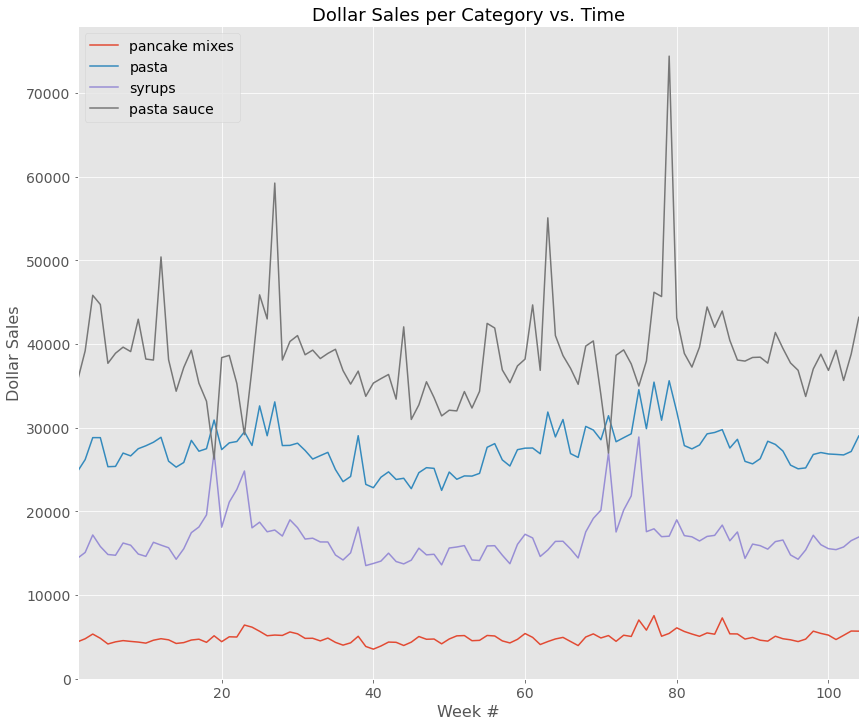

In [417]:
# Section 2 Question 4

def weekly_trends():
    trans_product = transactions.join(product.set_index('upc'), on='upc') # join the transaction and product tables on the 'upc' column
    weekly = trans_product.groupby(['commodity','week'])['dollar_sales'].sum() # find the sum of the weekly dollar sales for each commodity
    indices = list(set([commodity[0] for commodity in weekly.index.tolist()])) # find the indices

    weekly_sales = dict() # initialize a dictionary to store dollar sales per week per commodity in
    for ind in indices:
        weekly_sales[ind] = weekly[ind] # assign the sum of dollar sales per week to each commodity in a dictionary format

    # plot dollar sales per category over time
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(14,12)) # initialize figure
    for i in range(0,len(indices)):
        ax.plot(x,weekly_sales[indices[i]],label=indices[i]) # plot sales vs week
    ax.set_xlabel('Week #',fontsize=16) # set x label
    ax.set_ylabel('Dollar Sales',fontsize=16) # set x label
    ax.legend(loc='upper left',fontsize=14) # create legend
    ax.set_xlim([min(x),max(x)]) # set x axis boundaries
    ax.set_title('Dollar Sales per Category vs. Time',fontsize=18) # create title
    plt.tick_params(labelsize=14) # set tick label sizes

weekly_trends()

# From the graph below we can see that pasta sauce has the highest dollar sales of the product categories,
# followed by pasta, syrups, and then pancake mixes. Some seasonal yearly fluctuation is observed, where
# product sales for all products show some increase around weeks 20-30 and weeks 70-80

In [572]:
# Section 2 Question 5

'''
To answer this question, a pre-built algorithm such as the mlxtend apriori algorithm could be used, 
but I have provided a method from scratch below to demonstrate how I would solve this manually. 

inputs:
num_items = number of items commonly purchased together (i.e. a '2' here would calculate groups of 2 items are most often purchased together)
top_n = number of top purchased item groups to display (i.e. a '10' here would show the top 10 groups most commonly purchased together)

outputs:
top_items_purchased_together = each group of commonly purchased items and the number of times it was purchased in the same basket

'''

def commonly_purchased_together(num_items, top_n):
    trans_product = transactions.join(product.set_index('upc'), on='upc') # join the transaction and product tables on the 'upc' column
    commodities = ['pasta', 'pasta sauce'] # we are only interested in pasta and pasta sauce
    pasta_category = trans_product[trans_product['commodity'].isin(commodities)] # filter dataframe to only products in the pasta category

    # find top 25% of products sold, to reduce compute time when calculating products commonly sold together
    product_counts = (pasta_category.groupby('product_description')['basket'].count().reset_index(name='count').sort_values(['count'], ascending=False)) # find how many of each product was sold and sort by count descending
    product_counts_top25 = product_counts[0:int(len(product_counts)*0.25)] # get only top 25% of products
    pasta_top25 = pasta_category[pasta_category['product_description'].isin(list(product_counts_top25['product_description']))] # filter dataframe to only products in the top 25% of products sold
    
    baskets = pasta_top25.groupby('basket')['product_description'].apply(list).to_dict() # create dictionary of baskets with the names of the product in each basket
    
    purchased_together = dict() # initialize dictionary of items purchased together

    for key, val in baskets.items():
        basket = baskets[key]
        if len(basket) > 1:
            combinations = list(itertools.combinations(baskets[key],num_items)) # find all possible unique combinations of num_items number of items
            for item in combinations:  
                item = tuple(sorted(item)) # sort each item combination alphabetically so items in combinations will always be ordered the same
                if item in purchased_together.keys():
                    purchased_together[item] += 1 # if the item is already in the dictionary, add 1 to its value
                else:
                    purchased_together[item] = 1 # if the item is not already in the dictionary, create a new key and set the value equal to 1
    
    top_items_purchased_together = sorted(purchased_together.items(), key=lambda x: x[1], reverse=True)[0:10]

    return top_items_purchased_together

commonly_purchased_together(2,10) # if num_items = 2 this function will show you the two items most often purchased together, if num_items = 3 it will show the 3 items most often purchased together, etc. top_n is the number of top items to display

[(('PRIVATE LABEL THIN SPAGHETTI', 'RAGU TRADITIONAL PLAIN'), 5886),
 (('PRIVATE LABEL SPAGHETTI REGULAR', 'RAGU TRADITIONAL PLAIN'), 5847),
 (('PRIVATE LABEL FETTUCCINI', 'RAGU\\CHZ CREATION ALFRDO'), 5603),
 (('PRIVATE LABEL ELBOW MACARONI', 'PRIVATE LABEL SPAGHETTI REGULAR'), 5049),
 (('HUNT TRADITIONAL SAUCE', 'PRIVATE LABEL SPAGHETTI REGULAR'), 4268),
 (('PRIVATE LABEL SPAGHETTI REGULAR', 'RAGU OWS SPAG SAUCE MEAT'), 4182),
 (('HUNT TRADITIONAL SAUCE', 'PRIVATE LABEL THIN SPAGHETTI'), 4082),
 (('PRIVATE LABEL THIN SPAGHETTI', 'RAGU OWS SPAG SAUCE MEAT'), 4057),
 (('PRIVATE LABEL ELBOW MACARONI', 'PRIVATE LABEL THIN SPAGHETTI'), 3942),
 (('PREGO REG SPAGHETTI SAUCE', 'PRIVATE LABEL THIN SPAGHETTI'), 3854)]